# Heart Disease Project with Classification Modelling

### Schematic overview of the 6-step process for machine learning modelling

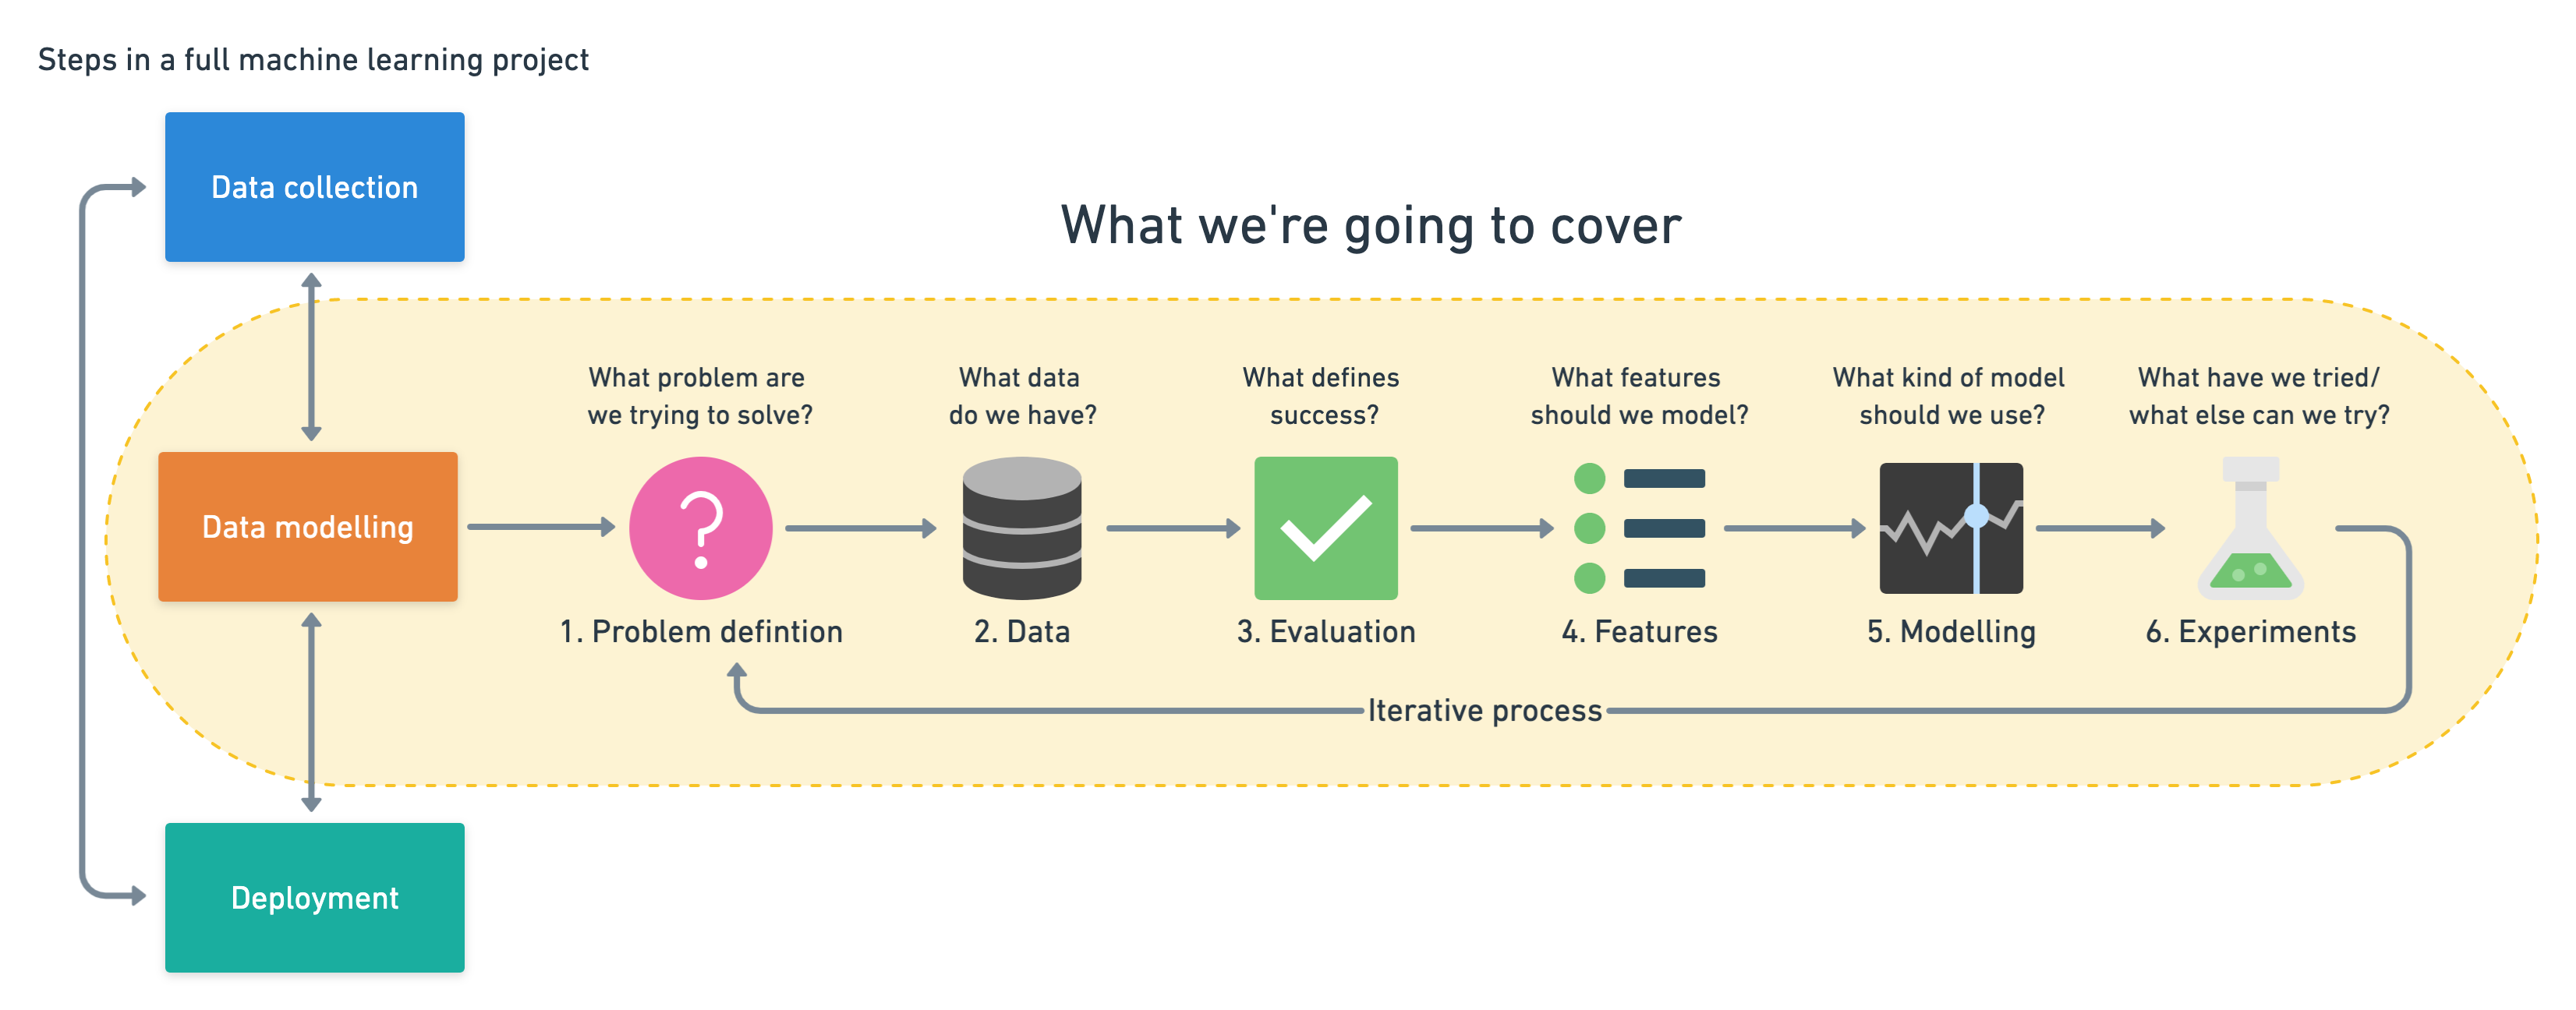

The following are the topics that I will look further into in this project:

* Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
* Model training - create model(s) to learn to predict a target variable based on other variables.
* Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
* Model comparison - comparing several different models to find the best one.
* Model fine-tuning - once we've found a good model, how can we improve it?
* Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
* Reporting what we've found - if we had to present our work, what would we show someone?




### The Tools that I will use per step

1. Data preprocessing/evaluation & analysis:
    * Pandas
    * NumPy
    * Matplotlib
2. Modelling
    * Scikit-Learn
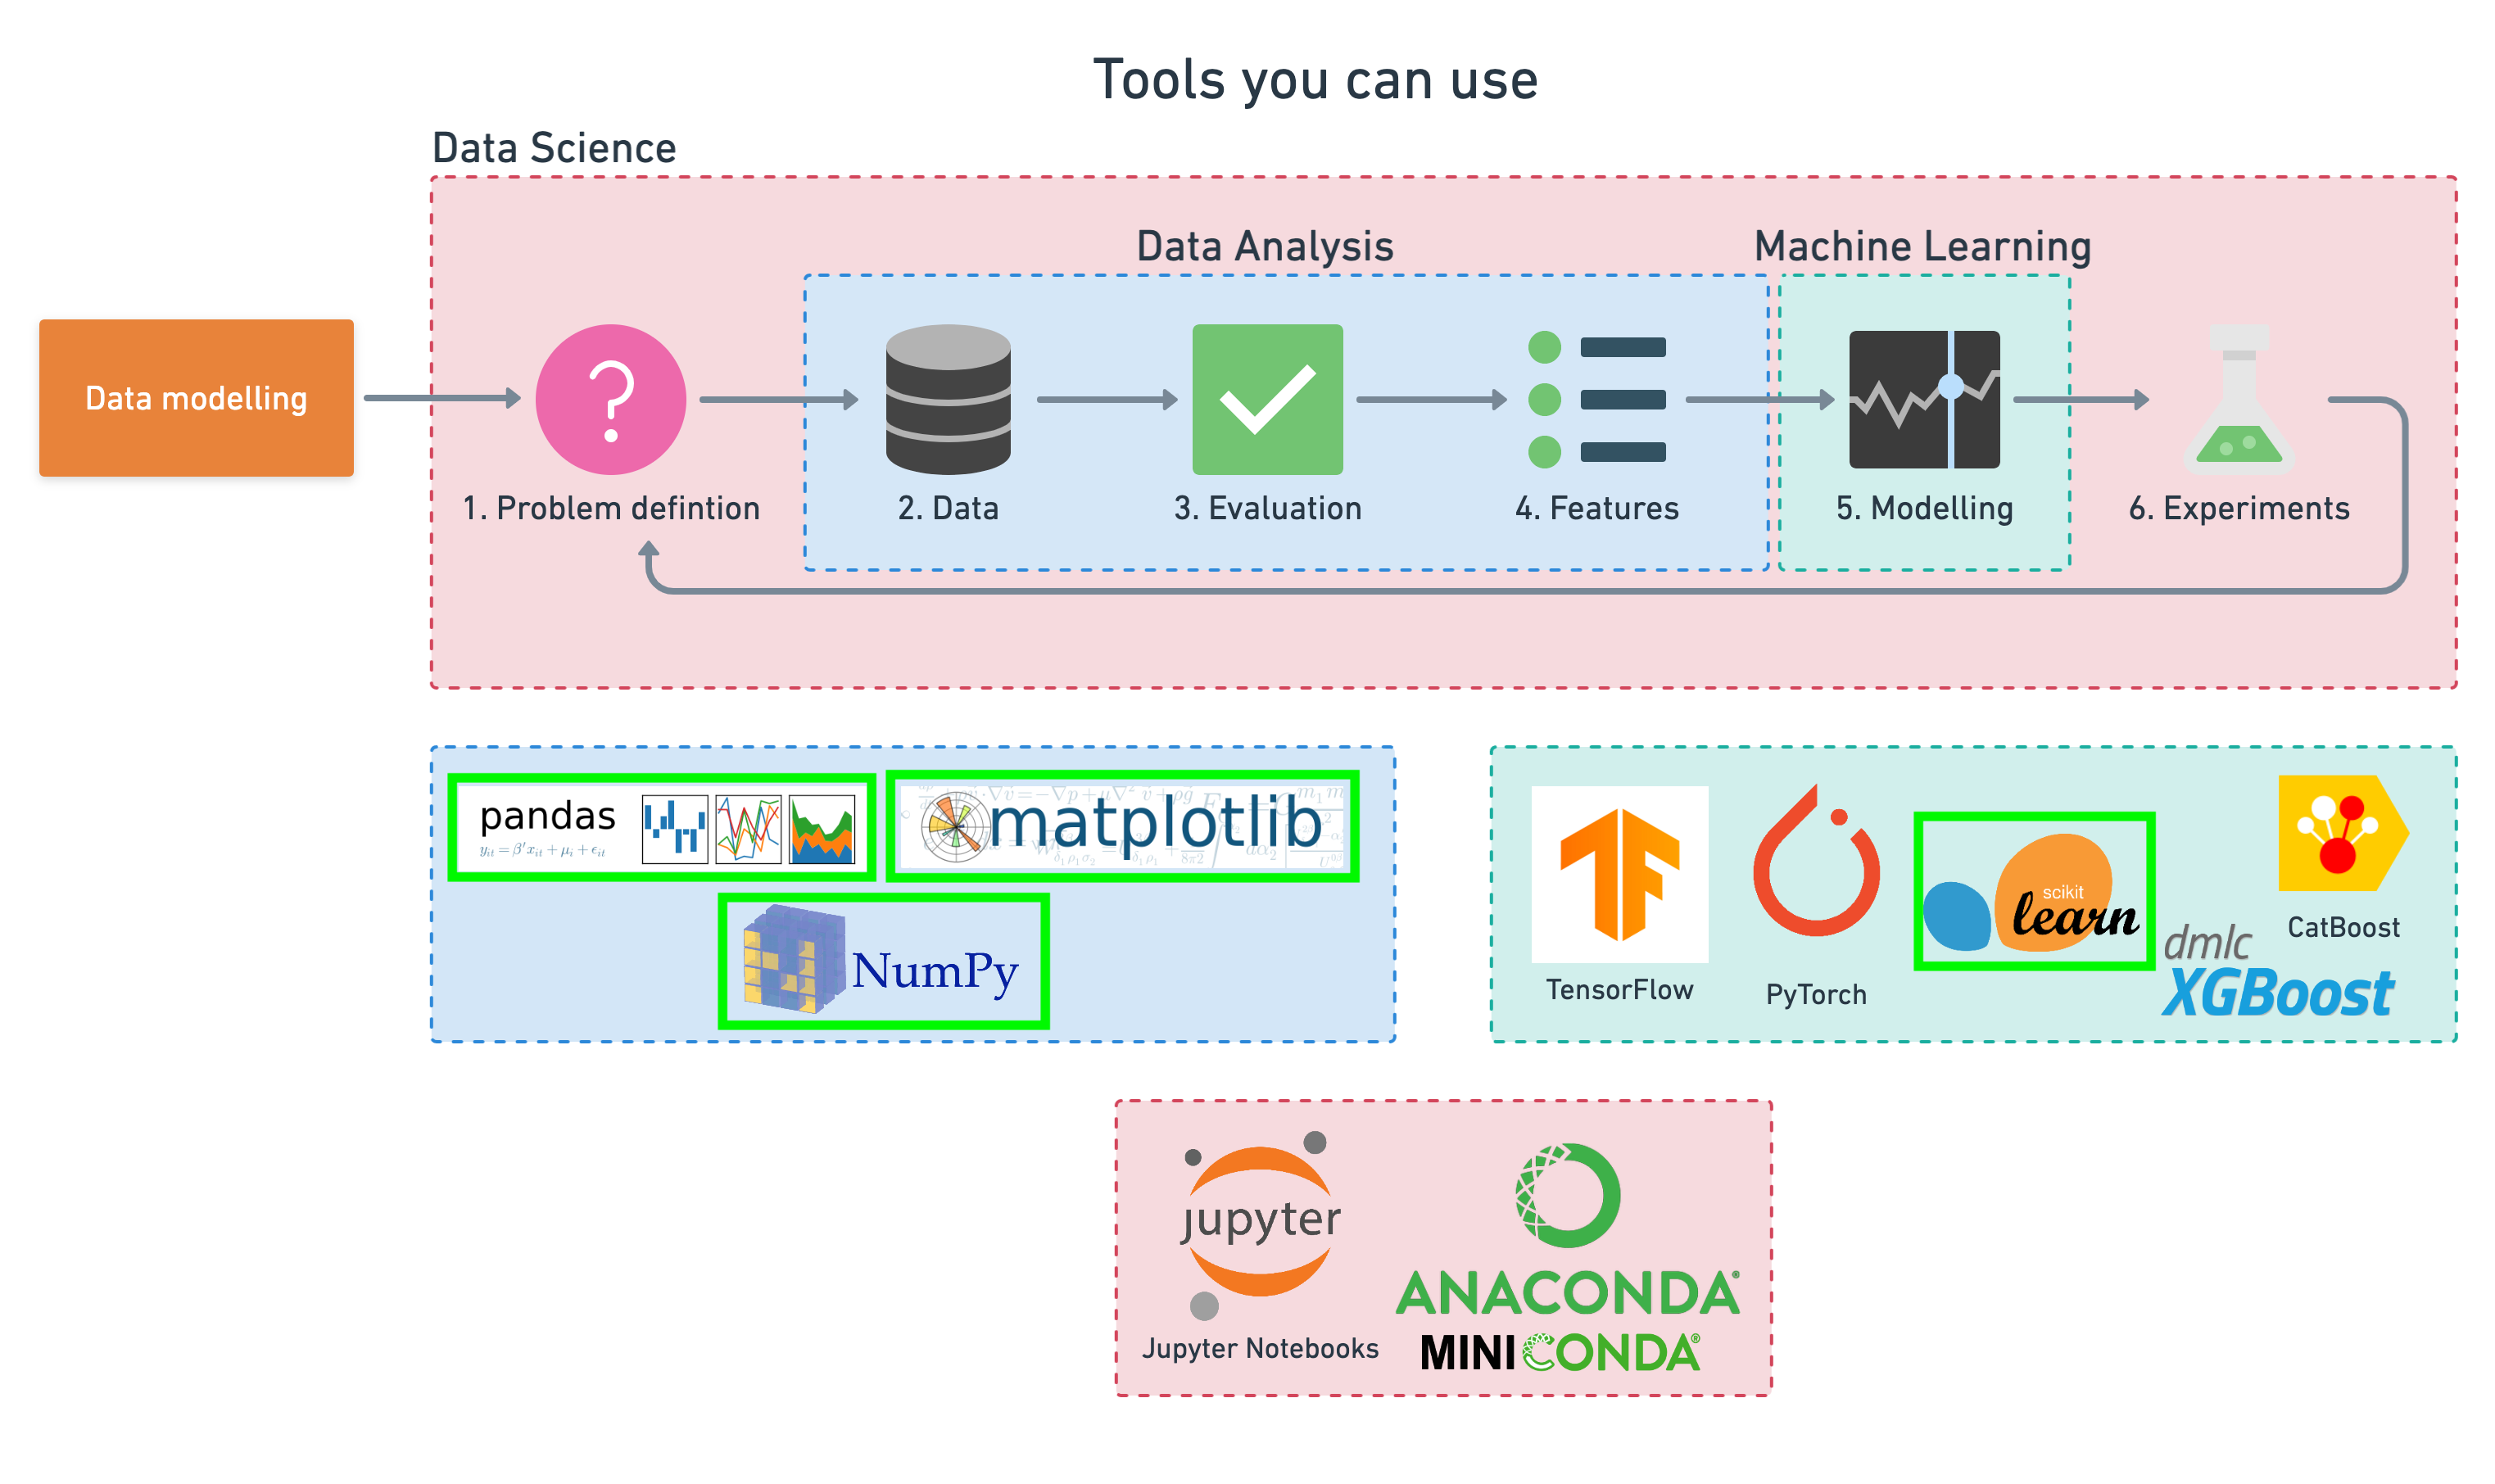

# 1. Problem Definition

Definition:
Can we predict with the given clinical parameters in the dataset which patients will have heart disease or not?

Using <b>Binary Classification</b> to predict the yes or no outcome

# 2. Data

Explanation of data:

* The original data comes from [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) which contains in total 75 attributes.
* The given dataset only contains 14 clinical parameters and comes pre-defined from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/)






# 3. Evaluation

The evaluation metrix will be defined in the beginning of the project but may be subject to change after evaluation further down the project after additional information.

This is because machine learning is experimental and results can vary extremely per project and type of modelling.

The metric is as follows:

* If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

# 4. Features

### Dictionary of the Heart Disease Dataset
1. age - age in years
1. sex - (1 = male; 0 = female)
3. cp - chest pain type
 * 0: Typical angina: chest pain related decrease blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
13. thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Tools needed for this project

1. Pandas
2. NumPy
3. Matplotlib/seaborn
4. Scikit-learn

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# I use a cumstomized theme for jupyter (chesterish) instead of the default
## So I have to add this piece of code to make the graphs readable
from jupyterthemes import jtplot
jtplot.style('chesterish')

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Loading the Data

In [3]:
df =pd.read_csv("../data/heart-disease.csv")
df.shape

(303, 14)

## Exploring the Data 

<b>Exploratory Data Analysis (EDA)</b>
 I will explore the data set in order to familiarize myself with it and to know where to look for answer and especially which questions to ask.
 
 My goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).
 
 Such as :
 1. What question(s) are you trying to solve (or prove wrong)?
 2. What kind of data do you have and how do you treat different types?
 3. What’s missing from the data and how do you deal with it?
 4. Where are the outliers and why should you care about them?
 5. How can you add, change or remove features to get more out of your data?

In [4]:
# Checking the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Asking summarized info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Describing the data set
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# How many participants have heart disease?
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
# And normalized?
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

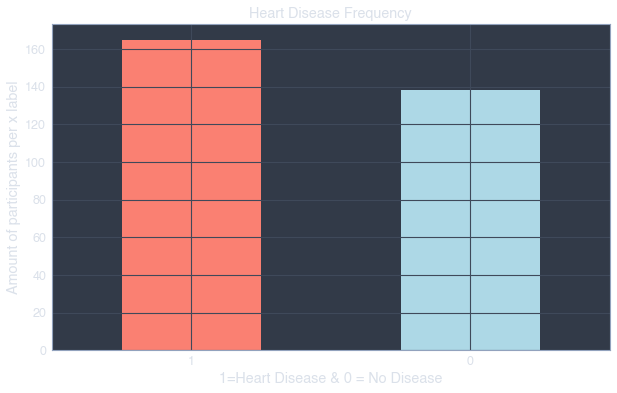

In [13]:
# Visualize this 
df.target.value_counts().plot(kind="bar",
                             color=["salmon","lightblue"],
                             figsize=(10,6))
# Adding some attributes
plt.title("Heart Disease Frequency")
plt.xlabel("1=Heart Disease & 0 = No Disease")
plt.ylabel("Amount of participants per x label")
plt.xticks(rotation=0)

In [14]:
# Check Heart Disease frequency per sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

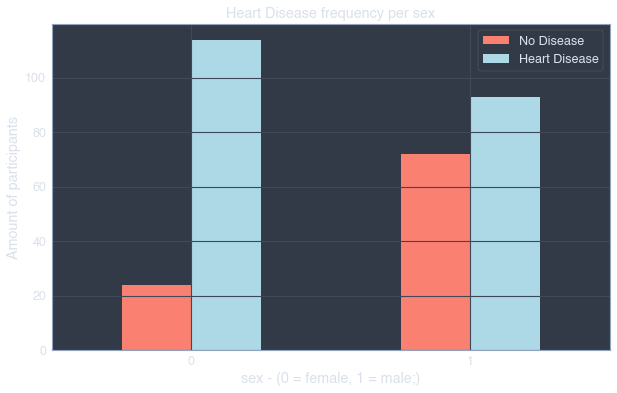

In [52]:
# Visualize this too
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                   color=(["salmon","lightblue"]))
# Attributes
plt.title("Heart Disease frequency per sex")
plt.legend(["No Disease","Heart Disease"])
plt.xlabel("sex - (0 = female, 1 = male;)")
plt.ylabel("Amount of participants")
plt.xticks(rotation=0)

In [23]:
# Check Heart Disease frequency per fasting blood sugar
## fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes
pd.crosstab(df.target, df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

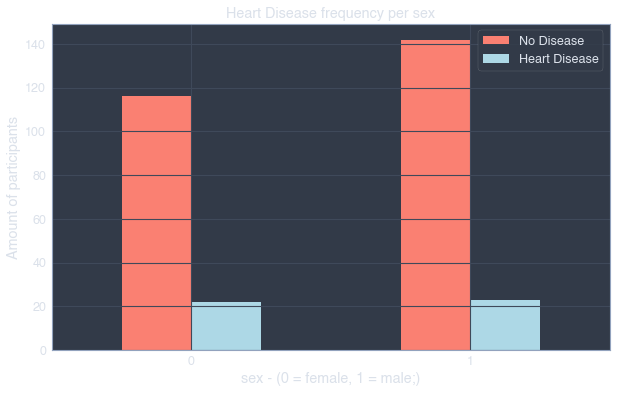

In [53]:
pd.crosstab(df.target, df.fbs).plot(kind="bar",
                                    figsize=(10,6),
                                   color=(["salmon","lightblue"]))
# Attributes
plt.title("Heart Disease frequency per sex")
plt.legend(["No Disease","Heart Disease"])
plt.xlabel("sex - (0 = female, 1 = male;)")
plt.ylabel("Amount of participants")
plt.xticks(rotation=0)

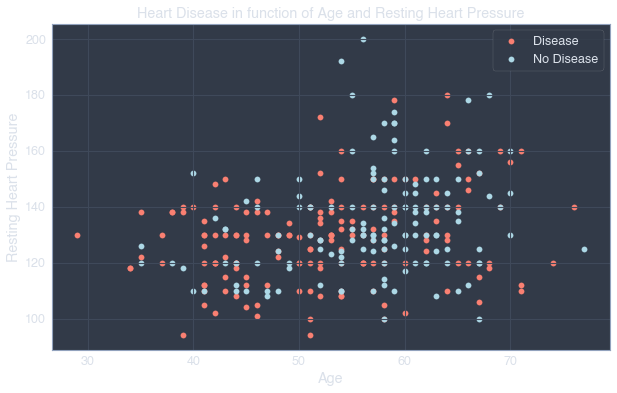

In [38]:
# What about Age and resting heart pressure for Heart Disease?

#Create figure for this cell
plt.figure(figsize=(10,6))
#Add scatter plot & data for postive cases (target==1)
plt.scatter(df.age[df.target==1],
            df.trestbps[df.target==1],
           color="salmon")
# Add the same but for negative cases (target==0)
plt.scatter(df.age[df.target==0],
            df.trestbps[df.target==0],
           color="lightblue")
# Add some helpful info
plt.title("Heart Disease in function of Age and Resting Heart Pressure")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Resting Heart Pressure");


### Observation
#### 1. It seems as if a lower heart pressure and a younger age creates more disease instances
#### 2. The older the patient is the higher the Resting Heart Pressure seems to develop towards


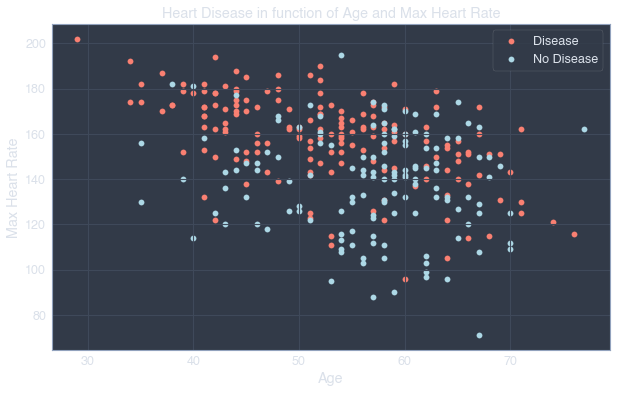

In [39]:
# What about Age and Max Heart Rate?

# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

### Observation
#### 1. Now it seems as if a lower age and a higher Max Heart Rate increases disease instances as well
#### 2. The younger a patient thus the higher the Max Heart Rate as well as vice versa

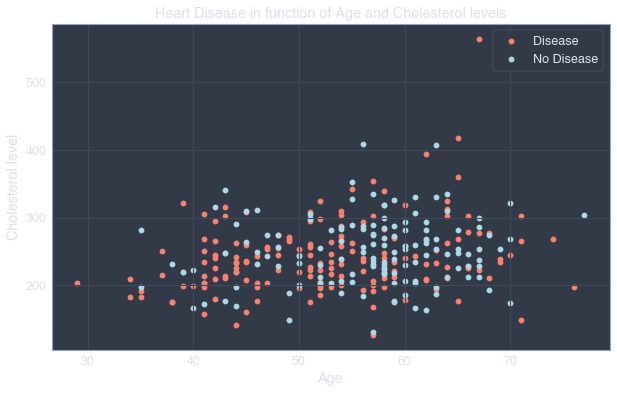

In [69]:
# What about Age and Cholesterol?

# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Cholesterol levels")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Cholesterol level");

## First Major Question
### Do patients with early Heart Disease pass away before they reach an older age (>60>?
### Whereas patients with a healthy heart reach old age without ever developing a heart disease?
### So what is causing this?

(<AxesSubplot:ylabel='Frequency'>, 54.366336633663366)

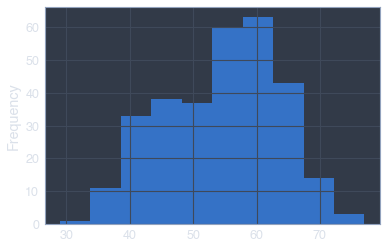

In [43]:
# Is the Age distribution skewing the visualization of the scatter plots?
df.age.plot.hist(), df.age.mean()
## There are way more patients at 60 years of age
## The Age mean of the participants is 54 years old

In [44]:
# What about chestpain?
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

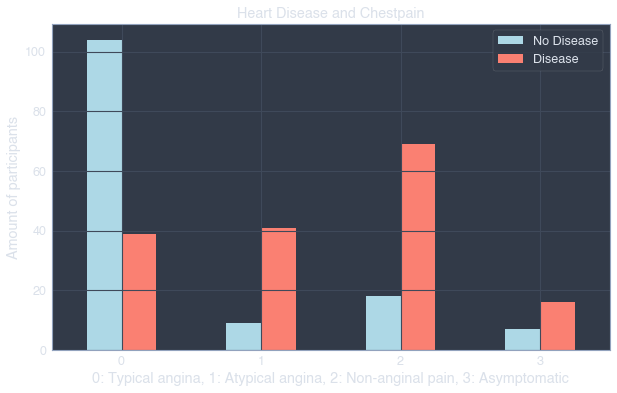

In [54]:
# Visualize it
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue", "salmon"])
# Add some helpful info
plt.title("Heart Disease and Chestpain")
plt.xlabel("0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic")
plt.legend(["No Disease", "Disease"])
plt.ylabel("Amount of participants");
plt.xticks(rotation=0)
# Chest pain seems to be associated with target==1 i.e. Heart Disease

## Performing Correlation between independent variables

In [55]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


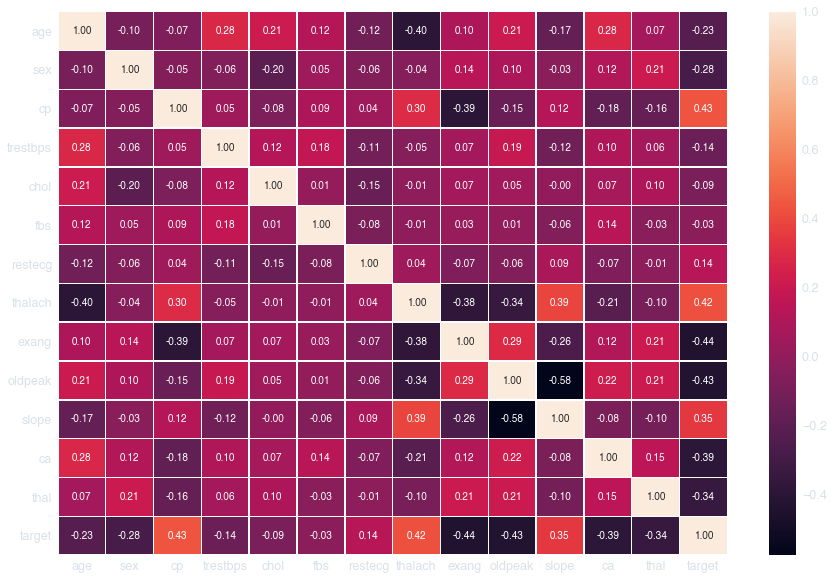

In [57]:
# Visualizing
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True,  # shows numbers per swaure
            linewidths=0.5, 
            fmt= ".2f"); # 2 Decimals


## Observation
### Looking at target: numbers closer 1 correlate with a higher possibility of heart disease whereas closer 0 is vice versa

#### Parameters worthy of suspicion with a positive link (target==1):
1. cp or Chest Pain
2. Thalach or Max Heart Rate
3. slope or Slope of Peack Exercise

#### Parameters worthy of suspicion with a negative link (target==0):
1. exang or Exercise induced angina (1 = yes; 0 = no
2. oldpeak or ST depression induced by exercise relative to rest
3. ca or Number of major vessels (0-3) colored by flourosopy colored vessel 
4. thal or Thalium Stress Result

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

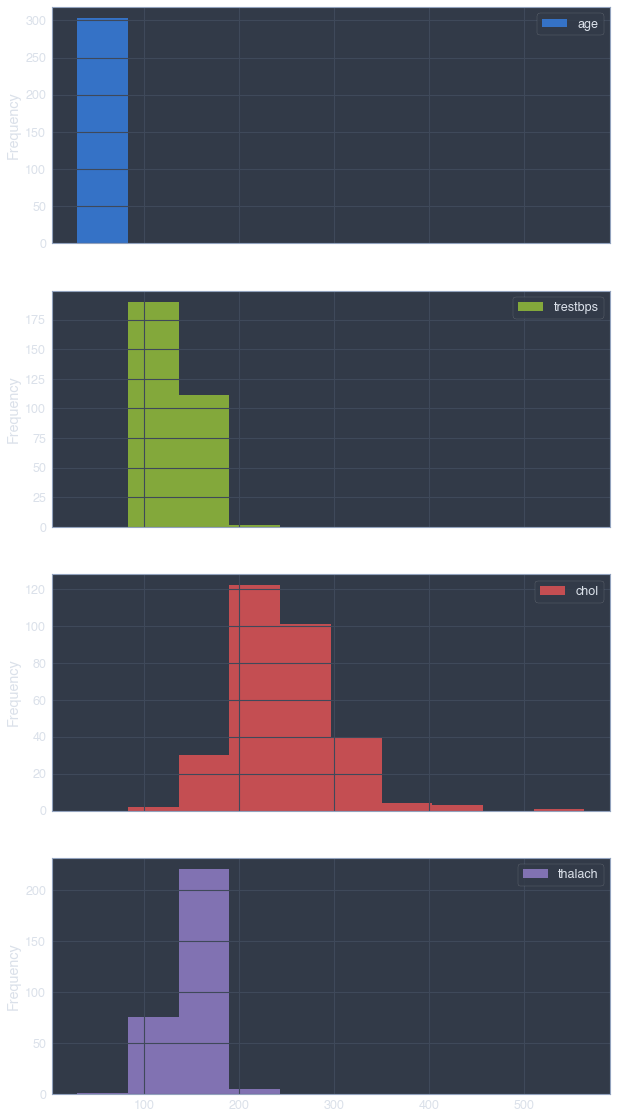

In [61]:
highAmounts = df[["age","trestbps","chol","thalach"]]
highAmounts.plot.hist(figsize=(10,20), subplots=True)

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

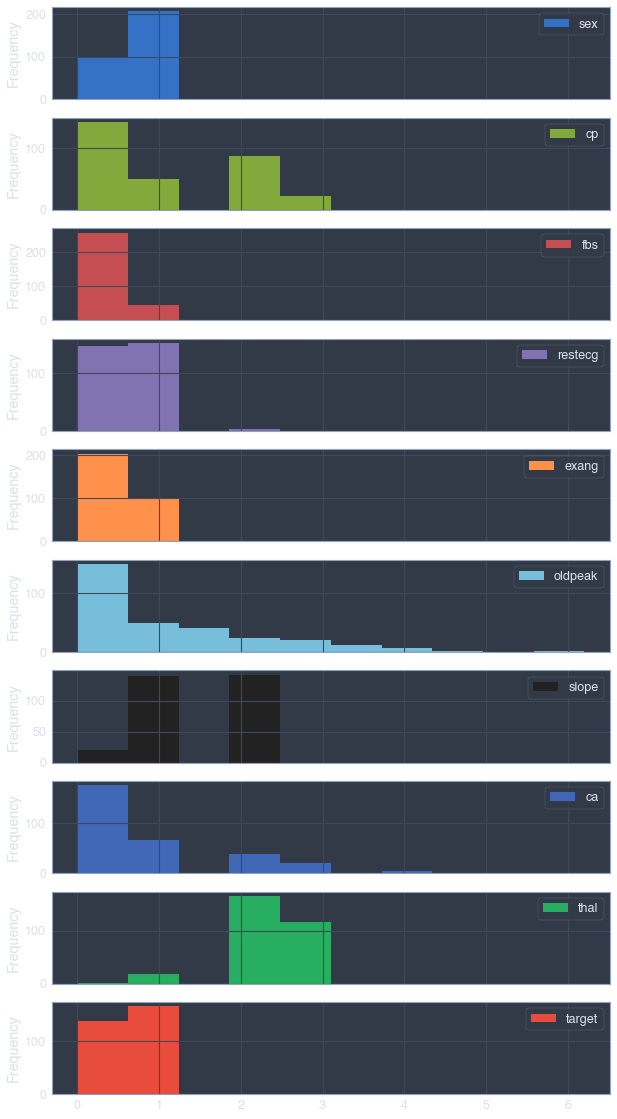

In [68]:
lowAmounts = df.drop(["age","chol","trestbps","thalach"],axis=1)
lowAmounts.plot.hist(figsize=(10,20),subplots=True)

# 5. Modelling 

### Binary Classification will be used

The [map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) of Scikit-Learn will be used as a reference into choosing the right estimator

The first estimator to work with will be Linear SVC

The Second estimator that will be used will be KNeighbors Classifier

The third estimator will be SVC & Ensemble Classifiers